### RyanAir Customer review analysis 

#### Business Understanding 
In the airline industry, customer reviews and surveys play a pivotal role in shaping and enhancing the overall customer experience. Companies, such as RyanAir, routinely conduct follow-ups on specific services based on valuable customer feedback, making necessary improvements to ensure satisfaction.

Customer reviews hold significant influence, often swaying people's decisions to try out a particular airline. These reviews impact critical aspects, including boarding decisions. Recognizing the importance of customer feedback is crucial in a service-oriented industry like aviation, as it not only guides improvements but also contributes to better recommendations and choices in the market.

### Objectives
1. Conduct a sentiment analysis of **RyanAir** customer reviews.
2. Identify the most logged complainfrom clients.
3. Assess passenger classes to determine which class receives the highest number of complaints and, conversely, the highest appreciation.  

In [1]:
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np 
import requests 
import re  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer  
from nltk.tokenize import word_tokenize
import string 
from sklearn.feature_extraction.text import TfidfVectorizer   

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



Scrape reviews from the Skytrax website using beautiful soup.

In [2]:
# Scrape the reviews from skytrax website 
base_url = "https://www.airlinequality.com/airline-reviews/ryanair"
pages = 20 
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [5]:
# Save the reviews to a pandas dataframe and later to a CSV file. 
df = pd.DataFrame(reviews)
df.to_csv("ryan_reviews.csv")

In [2]:
df2 = pd.read_csv("ryan_reviews.csv")
df2.head()

,Unnamed: 0,0
0,0,✅ Trip Verified | Really impressed! You get wh...
1,1,✅ Trip Verified | I should like to review my ...
2,2,✅ Trip Verified | Flight left the gate ahead o...
3,3,Not Verified | Booked a fight from Copenhagen ...
4,4,Not Verified | The flight itself is operated ...


In [3]:
df2.rename(columns={'0':'air_reviews'}, inplace=True)
df2.drop(columns=['Unnamed: 0'], inplace=True) 

In [4]:
# Split the data to only include the review 
df2['air_reviews'] = df2['air_reviews'].str.split('|',expand=True)[1]

In [10]:
# Drop null values. 
df2.dropna(inplace=True)

In [11]:
# Function to clean up text and make it ready for topic modelling. 
def clean_text(text):
    """
    Function to clean up the text by lowercasing,
    removing the dates and any other numbers present.
    It also tokenizes the words and vectorizes them for modellng        
    Parameters
    ----------
    data : string
        The text to be cleaned.
    Returns
    -------
    data_token : list
        A list of the tokenized words.
    data_vec : TfidfVectorizer
        A vectorizer object.
    """
    # Lowercase the text
    text = text.lower() 
    # Remove the punctuations 
    text = re.sub(r'[^\w\s]', '', text) 
    # Remove the dates  
    text = re.sub(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{4}\b', '', text)
    # remove any numbers 
    text = re.sub(r'\d+', '', text)        
    
    return text    

In [12]:
df2['air_reviews'] = df2['air_reviews'].apply(clean_text)

In [13]:
df2

,air_reviews
0,really impressed you get what you pay for thi...
1,i should like to review my flight from faro ...
2,flight left the gate ahead of schedule fare w...
3,booked a fight from copenhagen to poland thou...
4,the flight itself is operated by malta air a...
...,...
1364,i flew ryanair from london luton to malta in...
1365,first flight from athens to thessaloniki ful...
1366,gladub day return tickets a bargain at for ...
1367,seville to dublin with ryanair loud creaking...


In [25]:
# Initialize the sentiment analyzer and get their respective polarity scores. 
st_analyze = SentimentIntensityAnalyzer()

sentiments = []

for row in df2['air_reviews']:
    r = st_analyze.polarity_scores(row)
    sentiments.append(r)


df3 = pd.DataFrame(sentiments)
df3

,neg,neu,pos,compound
0,0.067,0.715,0.218,0.8455
1,0.047,0.888,0.065,0.5605
2,0.000,0.780,0.220,0.8402
3,0.097,0.880,0.023,-0.9110
4,0.116,0.759,0.125,0.5172
...,...,...,...,...
1298,0.039,0.917,0.044,0.0772
1299,0.023,0.921,0.056,0.5854
1300,0.032,0.852,0.116,0.9339
1301,0.075,0.883,0.043,-0.6124


In [26]:
df_final = pd.concat([df2.reset_index(drop=True), df3], axis=1)

In [27]:
# Function to categorize the sentiments into positive, negative and neutral. 
def categorize_sentiment(data):
    if data['compound'] > 0:
        return "positive"
    elif data['compound'] < 0:
        return "negative"
    else:
        return "neutral"

In [28]:
df_final['sentiment'] = df_final.apply(categorize_sentiment, axis=1)

In [29]:
df_final

,air_reviews,neg,neu,pos,compound,sentiment
0,really impressed you get what you pay for thi...,0.067,0.715,0.218,0.8455,positive
1,i should like to review my flight from faro ...,0.047,0.888,0.065,0.5605,positive
2,flight left the gate ahead of schedule fare w...,0.000,0.780,0.220,0.8402,positive
3,booked a fight from copenhagen to poland thou...,0.097,0.880,0.023,-0.9110,negative
4,the flight itself is operated by malta air a...,0.116,0.759,0.125,0.5172,positive
...,...,...,...,...,...,...
1298,i flew ryanair from london luton to malta in...,0.039,0.917,0.044,0.0772,positive
1299,first flight from athens to thessaloniki ful...,0.023,0.921,0.056,0.5854,positive
1300,gladub day return tickets a bargain at for ...,0.032,0.852,0.116,0.9339,positive
1301,seville to dublin with ryanair loud creaking...,0.075,0.883,0.043,-0.6124,negative


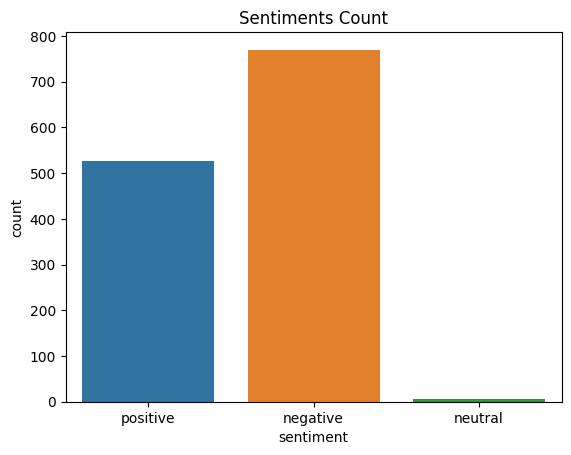

In [32]:
# Plot the counts of various sentiments.     
sns.countplot(data=df_final, x='sentiment')
plt.title("Sentiments Count")
plt.show()

From the **Sentiment analysis**, it is clear that the number of ngative sentiments exceeds the positive sentiments by almost 230. The number of neutral sentiments is way much less than the postives o rnegatives. 